<a href="https://colab.research.google.com/github/parvvaresh/Neural-Networks/blob/main/fars_news_v1.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning News Classification

This repository contains a machine learning project for classifying news articles into different categories. The project includes data preprocessing, feature extraction using various methods, and the application of different machine learning models.

## Table of Contents

- [Introduction](#introduction)
- [Installation](#installation)
- [Usage](#usage)
- [Dependencies](#dependencies)
- [Data](#data)
- [Preprocessing](#preprocessing)
- [Feature Extraction](#feature-extraction)
- [Machine Learning Models](#machine-learning-models)
- [Results](#results)
- [Contributing](#contributing)
- [License](#license)

## Introduction

This project aims to classify news articles into different categories such as sports, politics, social, economy, and culture-media. It involves the use of various natural language processing techniques and machine learning models to achieve accurate classification.

## Dependencies

- Google Colab (for Jupyter notebook)
- Python 3.x
- pandas
- matplotlib
- string
- re
- hazm
- numpy
- torch
- transformers
- sentence-transformers
- accelerate
- scikit-learn
- datasets
- huggingface-hub
- kaggle

## Data

The dataset used in this project is stored in the CSV file `farsnews_fainal.csv`. It contains news articles with corresponding labels.

## Preprocessing

The preprocessing steps involve cleaning and normalizing the text data. This includes removing unnecessary spaces, crash data, punctuation, diacritics, and normalizing Persian characters. Additionally, the dataset is balanced to ensure equal representation of each category.
Certainly! If you want to include word frequency as part of the feature extraction section, you can modify the "Feature Extraction" section in the README as follows:

## Feature Extraction

Four different methods are used for feature extraction:

1. **TF-IDF Vectorization**: Converts the text data into numerical vectors using the TF-IDF method.
2. **Word Frequency**: Analyzes the frequency of each word in the corpus and represents the text data based on word occurrences.
3. **BERT Vectorization**: Uses the pre-trained BERT model for encoding the text data into numerical vectors.
4. **LaBSE Vectorization**: Utilizes the LaBSE (Language-agnostic BERT Sentence Embedding) model for encoding text data.


## Machine Learning Models

Various machine learning models are trained and evaluated on the feature-extracted data. The models include:

- Logistic Regression
- K-Nearest Neighbors
- Weighted K-Nearest Neighbors
- Naive Bayes
- Decision Tree
- Support Vector Machine (SVM)
- Gradient Boosting

The models are evaluated based on accuracy scores and confusion matrices.



#install package and import

## install paackage

In [1]:
#for clear cash output for this note book
from google.colab import output

#install package
!sudo apt-get install git-lfs
!pip install -qU transformers
!pip install -qU sentence-transformers
!pip install accelerate -U
!pip install hazm
!pip install datasets transformers huggingface-hub kaggle
output.clear()

## import package

In [3]:
#import package
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import hazm
import numpy as np
import seaborn as sns


from joblib import Parallel, delayed
import joblib

import torch
import transformers
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer
from huggingface_hub import notebook_login
from datasets import load_metric




from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2



#conect to google drive
from google.colab import drive
drive.mount('/content/drive')

#for ignore warning python
import warnings
warnings.filterwarnings("ignore")

output.clear()

#add and read data sets

In [4]:
df = pd.read_csv("/content/drive/MyDrive/get news/farsnews/farsnews_fainal.csv")

df = df.drop('Unnamed: 0', axis=1)
df.head(5)

,title,text,date,label
0,قارایی: در تلاشم تا سیاه نمایی درباره ایران با...,خبرگزاری فارس - گروه هنر و رسانه - علی عبدالهی...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media
1,توجه ویژه به اقوام و چهره های مردمی در فصل جدی...,به گزارش خبرگزاری فارس، پویان هدایتی، تهیه کن...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media
2,جان فدا| ویژه برنامه هاى تلویزیون در سومین سال...,به گزارش خبرنگار رادیو و تلویزیون خبرگزاری فار...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media
3,محمد علی صائب رئیس خبرگزاری صدا وسیما شد,به گزارش خبرگزاری فارس، علیرضا خدابخشی، معاون ...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media
4,«همراه با خاطره ها» تمدید شد,به گزارش خبرگزاری فارس به نقل از روابط عمومی و...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media


## see info about a data set

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64944 entries, 0 to 64943
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   64944 non-null  object
 1   text    64942 non-null  object
 2   date    64944 non-null  object
 3   label   64944 non-null  object
dtypes: object(4)
memory usage: 2.0+ MB


In [6]:
df.describe()

,title,text,date,label
count,64944,64942,64944,64944
unique,64392,64631,1,5
top,کیفیت هوای تهران در روز جاری,به گزارش خبرنگار کتاب و ادبیات خبرگزاری فارس، ...,۰۹:۳۹ - ۱۴۰۲-۳-۶,sports
freq,21,5,64944,21397


## counts a label and plotting it for visual better

In [7]:
label_counts = pd.DataFrame(df["label"].value_counts())
label_counts

,label
sports,21397
social,12802
culture-media,11324
economy,10163
politics,9258


<BarContainer object of 5 artists>

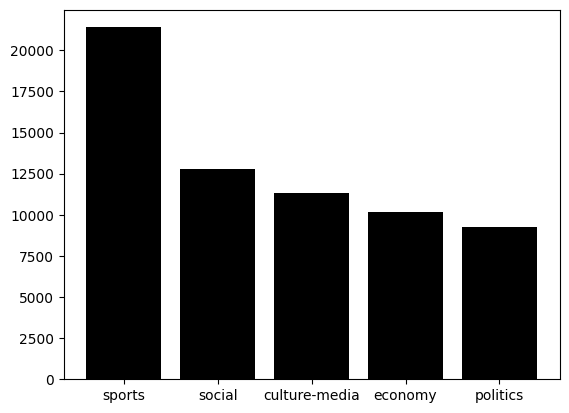

In [8]:
plt.bar(label_counts.index, height=label_counts["label"],color="black")

## He sees how unbalanced the balance of the data is, so we separated the lowest value from each label.

In [9]:
temp = df.copy()

df = pd.DataFrame()

gb = temp.groupby(['label'])


#this is for me please replace to (9258)
min_size = 1500
for label in set(temp["label"]):
  cash = gb.get_group(label).head(min_size)
  df = df.append(cash, ignore_index=True)

df.head()

,title,text,date,label
0,قارایی: در تلاشم تا سیاه نمایی درباره ایران با...,خبرگزاری فارس - گروه هنر و رسانه - علی عبدالهی...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media
1,توجه ویژه به اقوام و چهره های مردمی در فصل جدی...,به گزارش خبرگزاری فارس، پویان هدایتی، تهیه کن...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media
2,جان فدا| ویژه برنامه هاى تلویزیون در سومین سال...,به گزارش خبرنگار رادیو و تلویزیون خبرگزاری فار...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media
3,محمد علی صائب رئیس خبرگزاری صدا وسیما شد,به گزارش خبرگزاری فارس، علیرضا خدابخشی، معاون ...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media
4,«همراه با خاطره ها» تمدید شد,به گزارش خبرگزاری فارس به نقل از روابط عمومی و...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media


## counts a label and plotting it for visual better after balance

In [10]:
label_counts = pd.DataFrame(df["label"].value_counts())
label_counts

,label
culture-media,1500
politics,1500
sports,1500
economy,1500
social,1500


<BarContainer object of 5 artists>

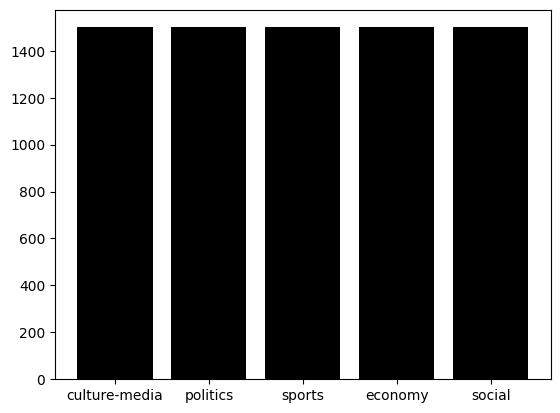

In [11]:
plt.bar(label_counts.index, height=label_counts["label"],color="black")

#pre process title

## Implementation

In [12]:
class pre_process:
  def __init__(self):
    pass

  def remove_space(self, text):
    return text.strip().split('\t')[0]

  def remove_crash_data(self, text):
    if isinstance(text, str):
      return text
    else:
      return None

  def normalize(self, text):
    return text.replace('|', ' ')

  def dropna(self, df):
    return df.dropna()


## aplly it

In [13]:
pp = pre_process()

#this is a about text
df["title"] = df["title"].apply(pp.remove_space)
df["title"] = df["title"].apply(pp.normalize)
df["title"] = df["title"].apply(pp.remove_crash_data)


#this is a about data
df = pp.dropna(df)
df.head(5)

,title,text,date,label
0,قارایی: در تلاشم تا سیاه نمایی درباره ایران با...,خبرگزاری فارس - گروه هنر و رسانه - علی عبدالهی...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media
1,توجه ویژه به اقوام و چهره های مردمی در فصل جدی...,به گزارش خبرگزاری فارس، پویان هدایتی، تهیه کن...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media
2,جان فدا ویژه برنامه هاى تلویزیون در سومین سال...,به گزارش خبرنگار رادیو و تلویزیون خبرگزاری فار...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media
3,محمد علی صائب رئیس خبرگزاری صدا وسیما شد,به گزارش خبرگزاری فارس، علیرضا خدابخشی، معاون ...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media
4,«همراه با خاطره ها» تمدید شد,به گزارش خبرگزاری فارس به نقل از روابط عمومی و...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media


# vectorize a label  (encode a label of data)

## Implementation

In [14]:
class labelEncoder:
  def __init__(self):
    pass

  def fit(self, df, col):
    labels = df[col].unique()
    self.transforme = dict()

    for index in range(0 , len(labels)):
      self.transforme.update({labels[index] : index})
    labels_transforme = list()

    for label in df[col]:
      labels_transforme.append(self.transforme[label])

    df[f"{col} Encode"] = labels_transforme
    return df

  def get_transforme(self):
    return  self.transforme

## aplly it

In [15]:
le = labelEncoder()
df = le.fit(df, "label")
df.head()

,title,text,date,label,label Encode
0,قارایی: در تلاشم تا سیاه نمایی درباره ایران با...,خبرگزاری فارس - گروه هنر و رسانه - علی عبدالهی...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media,0
1,توجه ویژه به اقوام و چهره های مردمی در فصل جدی...,به گزارش خبرگزاری فارس، پویان هدایتی، تهیه کن...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media,0
2,جان فدا ویژه برنامه هاى تلویزیون در سومین سال...,به گزارش خبرنگار رادیو و تلویزیون خبرگزاری فار...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media,0
3,محمد علی صائب رئیس خبرگزاری صدا وسیما شد,به گزارش خبرگزاری فارس، علیرضا خدابخشی، معاون ...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media,0
4,«همراه با خاطره ها» تمدید شد,به گزارش خبرگزاری فارس به نقل از روابط عمومی و...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media,0


In [16]:
df.iloc[1]["title"]

'توجه ویژه به اقوام و چهره های مردمی در فصل جدید «نشان ارادت»/ پخش در محرم و صفر 1402'

In [17]:
le.get_transforme()

{'culture-media': 0, 'politics': 1, 'sports': 2, 'economy': 3, 'social': 4}



*  **for guidance:‌**


sports -> 0

politics -> 1

social -> 2

economy -> 3

culture-media -> 4


## see visual it

In [18]:
labelEncode_counts = pd.DataFrame(df["label Encode"].value_counts())
labelEncode_counts

,label Encode
0,1500
1,1500
2,1500
3,1500
4,1500


<BarContainer object of 5 artists>

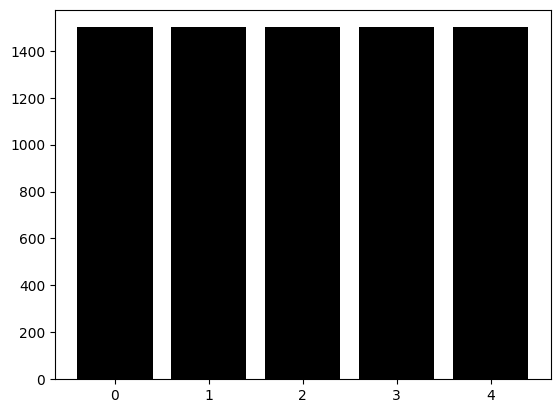

In [19]:
plt.bar(labelEncode_counts.index, height=labelEncode_counts["label Encode"],color="black")

## see shape all of them

# vectorize a datasets

## 1. vectorize with tf-idf


In [20]:
class tfidf:
  def __init__(self, df, col):
    self.ducs = list(df[col])
    self.size_duc = len(self.ducs)
    self.all_words = self.collet_words(self.ducs)
    self.word_index = self.create_word_index(self.all_words)
    self.word_count = self.create_word_count(self.ducs)




  def get_tf_idf(self, ducs):
    return self.tf_idf(ducs)


  def _tf_idf(self, duc):
    vec = np.zeros((len(self.all_words),))
    for word in duc:
        tf = self.tf(duc, word)
        idf = self.idf(word)
        vec[self.word_index[word]] = tf * idf
    return vec

  def create_word_index(self, all_words):
    word_index = {}
    for i, word in enumerate(all_words):
      word_index[word] = i
    return word_index

  def tf_idf(self, ducs):
    vectors = []
    for duc in ducs:
      vectors.append(self._tf_idf(duc))
    return np.array(vectors)

  def tf(self, document, word):
      N = len(document)
      occurance = len([token for token in document if token == word])
      return occurance / N

  def idf(self, word):
      try:
          word_occurance = self.word_count[word] + 1
      except:
          word_occurance = 1
      return np.log(self.size_duc / word_occurance)

  def collet_words(self, ducs):
    words = []
    for element in ducs:
      words.extend(element)
    return list(set(words))

  def create_word_count(self , ducs):
    words = []
    for element in ducs:
      words.extend(element)
    word_count = {}
    for word in words:
      if word in word_count:
        word_count[word] += 1
      else:
        word_count[word] = 1
    return word_count


## pre_process for tf-idf

In [21]:
class preprocessing:
  def __init__(self):
    persian_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
    self.punctuations_list = string.punctuation + persian_punctuations
    self.arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    self.stop_words = hazm.stopwords_list()
    self.lemmatizer = hazm.Lemmatizer()

  def _remove_diacritics(self, text):
    text = re.sub(self.arabic_diacritics, '', text)
    return text

  def _remove_punctuations(self, text):
    translator = str.maketrans('', '', self.punctuations_list)
    return text.translate(translator)

  def _remove_repeating_char(self, text):
    return re.sub(r'(.)\1+', r'\1', text)


  def _normalize_persian(self, text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ي", "ی", text)
    text = re.sub("ؤ", "و", text)
    text = re.sub("ئ", "ی", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("ك" ,"ک" , text)
    text = re.sub("[^ابپتثجچحخدذرزژسشصضطظعغفقکگلمنوهی]", " ", text)
    text = re.sub("[^\S\n\t]+", ' ', text)
    return text


  def _tokenize(self, text):
    return text.split()

  def _remove_stopwords(self, words):
    return [word  for word in words if word not in self.stop_words]

  def _lemmatizer(self, words):
    result = set()
    for token in words:
      result.add(self.lemmatizer.lemmatize(token))
    return list(result)

## aplly it

In [22]:
# pre-process for train data

pp = preprocessing()
df['title - preproces'] = df['title'].apply(pp._remove_diacritics)
df['title - preproces'] = df['title - preproces'].apply(pp._remove_punctuations)
df['title - preproces'] = df['title - preproces'].apply(pp._remove_repeating_char)
df['title - preproces'] = df['title - preproces'].apply(pp._normalize_persian)
df['title - preproces'] = df['title - preproces'].apply(pp._tokenize)
df['title - preproces'] = df['title - preproces'].apply(pp._remove_stopwords)
df['title - preproces'] = df['title - preproces'].apply(pp._lemmatizer)

In [23]:
df.iloc[1]['title - preproces']

['مردمی',
 'های',
 'اقوام',
 'فصل',
 'نشان',
 'ارادت',
 'صفر',
 'توجه',
 'چهره',
 'محرم']

## split data to test and train

detail :
*   70% for train
*   30% for test

In [24]:
y = df["label Encode"].to_numpy()
x = df["title - preproces"]

X_train, X_test, y_train_vec_tf_idf, y_test_vec_tf_idf = train_test_split(
     x , y, test_size=0.3, random_state=42)

## aplly tf-idf

In [25]:
vec_tf_idf = tfidf(df,"title - preproces")
X_train_vec_tf_idf = vec_tf_idf.get_tf_idf(X_train)
X_test_vec_tf_idf = vec_tf_idf.get_tf_idf(X_test)

## see shape

In [26]:
print(f"(x_train_tf_idf_vec) number of row : {X_train_vec_tf_idf.shape[0]} and number of columns : {X_train_vec_tf_idf.shape[1]}")
print(f"(X_test_tf_idf_vec) number of row : {X_test_vec_tf_idf.shape[0]} and number of columns : {X_test_vec_tf_idf.shape[1]}")




(x_train_tf_idf_vec) number of row : 5250 and number of columns : 7852
(X_test_tf_idf_vec) number of row : 2250 and number of columns : 7852


#chi2

You can see that the dimensions of this data are very large, so it should be reduced

**whats is chi2 ?**

Compute chi-squared stats between each non-negative feature and class.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.



In [27]:
transformer = SelectKBest(chi2, k = 500).fit(X_train_vec_tf_idf, y_train_vec_tf_idf)
X_train_vec_tf_idf = transformer.transform(X_train_vec_tf_idf)
X_test_vec_tf_idf = transformer.transform(X_test_vec_tf_idf)

print(f"(x_train_tf_idf_vec) number of row : {X_train_vec_tf_idf.shape[0]} and number of columns : {X_train_vec_tf_idf.shape[1]}")
print(f"(X_test_tf_idf_vec) number of row : {X_test_vec_tf_idf.shape[0]} and number of columns : {X_test_vec_tf_idf.shape[1]}")

(x_train_tf_idf_vec) number of row : 5250 and number of columns : 500
(X_test_tf_idf_vec) number of row : 2250 and number of columns : 500


## 2. vectorize with bert


### more explian it :
If you have better GPUs, you can increase these values:
* TRAIN_BATCH_SIZE = 6
* VALID_BATCH_SIZE = 4


In [28]:
MAX_LEN = 512



tokenizer_pbert = BertTokenizer.from_pretrained('HooshvareLab/bert-fa-zwnj-base')

metric = load_metric('matthews_correlation')

tokenizer_config.json:   0%|          | 0.00/292 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/426k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.11M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

## Implementation

In [29]:
class bert_vec2word:
  def __init__(self, tokenizer, max_len):
    self.tokenizer = tokenizer
    self.max_len = max_len

  def get_vec(self, text, what_type):
    text = str(text)
    text = " ".join(text.split())
    inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True,
            truncation=True
        )
    vec = inputs["input_ids"]

    if what_type == "numpy":
      return np.asarray(vec)

    elif  what_type == "torch":
      return torch.tensor(vec, dtype=torch.long)

    elif what_type == "orginal":
      return vec



## aplly it (numpy type)

In [30]:
vec_bert = bert_vec2word(tokenizer_pbert, MAX_LEN)


title_numpy_pbert = []


for index in range(df.shape[0]):
  vec = vec_bert.get_vec(df.iloc[index]['title'], "orginal")
  title_numpy_pbert.append(vec)


title_numpy_pbert = np.array(title_numpy_pbert)


## split to test and train

detail :
*   70% for train
*   30% for test

In [31]:
X_train_vec_pbert, X_test_vec_pbert, y_train_vec_pbert, y_test_vec_pbert = train_test_split(
     title_numpy_pbert , y, test_size=0.3, random_state=42)


print(f"(x_train_tf_idf_vec) number of row : {X_train_vec_pbert.shape[0]} and number of columns : {X_train_vec_pbert.shape[1]}")
print(f"(X_test_tf_idf_vec) number of row : {X_test_vec_pbert.shape[0]} and number of columns : {X_test_vec_pbert.shape[1]}")


(x_train_tf_idf_vec) number of row : 5250 and number of columns : 512
(X_test_tf_idf_vec) number of row : 2250 and number of columns : 512


## 3. vectorize with Labse


### more explian it :
If you have better GPUs, you can increase these values:
* TRAIN_BATCH_SIZE = 6
* VALID_BATCH_SIZE = 4


In [32]:
MAX_LEN = 512

tokenizer_labse = BertTokenizer.from_pretrained("setu4993/LaBSE")

metric = load_metric('matthews_correlation')

tokenizer_config.json:   0%|          | 0.00/367 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/13.6M [00:00<?, ?B/s]

## Implementation

In [33]:
class Labse_vec2word:
  def __init__(self, tokenizer, max_len):
    self.tokenizer = tokenizer
    self.max_len = max_len

  def get_vec(self, text, what_type):
    text = str(text)
    text = " ".join(text.split())
    inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True,
            truncation=True
        )
    vec = inputs["input_ids"]

    if what_type == "numpy":
      return np.asarray(vec)

    elif  what_type == "torch":
      return torch.tensor(vec, dtype=torch.long)

    elif what_type == "orginal":
      return vec

## aplly it (numpy type)

In [34]:
vec_bert = Labse_vec2word(tokenizer_labse, MAX_LEN)


title_numpy_Labse = []


for index in range(df.shape[0]):
  vec = vec_bert.get_vec(df.iloc[index]['title'], "orginal")
  title_numpy_Labse.append(vec)


title_numpy_Labse = np.array(title_numpy_pbert)

## split to test and train

detail :
*   70% for train
*   30% for test

In [35]:
X_train_vec_Labse, X_test_vec_Labse, y_train_vec_Labse, y_test_vec_Labse = train_test_split(
     title_numpy_Labse , y, test_size=0.3, random_state=42)


print(f"(x_train_tf_idf_vec) number of row : {X_train_vec_Labse.shape[0]} and number of columns : {X_train_vec_Labse.shape[1]}")
print(f"(X_test_tf_idf_vec) number of row : {X_test_vec_Labse.shape[0]} and number of columns : {X_test_vec_Labse.shape[1]}")

(x_train_tf_idf_vec) number of row : 5250 and number of columns : 512
(X_test_tf_idf_vec) number of row : 2250 and number of columns : 512


## 4. vectorize with freq word





##Implementation

In [36]:
class freqword:
  def __init__(self, data, words_col, target_col):
    self.data = data
    self.words_col = words_col
    self.target_col = target_col
    self.targets = data[self.target_col].unique()
    self.words = self.get_words(self.data[self.words_col])

    self.counter = self.create_counter()

  def transform(self):
    val = []
    for index in range(0 , self.data.shape[0]):
      words = self.data.iloc[index][self.words_col]
      target = self.data.iloc[index][self.target_col]
      for word in words:
        count_target = self.counter[word].copy()
        count_target[target] += 1
        self.counter[word] = count_target

    for key in self.counter:
        count_target = self.counter[key].copy()
        count = list(count_target.values())
        self.counter[key] = np.array(count)


    for index in range(0 , self.data.shape[0]):
      words = self.data.iloc[index][self.words_col]
      x = 0
      for word in words:
        count_target = self.counter[word].copy()
        x += count_target
      val.append(x)
    return np.array(val)

  def create_counter(self):
    count_targets = dict()
    for target in self.targets:
      count_targets[target] = 0

    counter = dict()
    for word in self.words:
      temp = count_targets.copy()
      counter[word] = temp
    return counter

  def get_words(self, all_words):
    words = []
    for element in all_words:
      words.extend(element)
    return list(set(words))

## apply it

In [37]:
fq_word2vec = freqword(df, "title - preproces", "label Encode")


vectors = fq_word2vec.transform()

## split to test and train

detail :
*   70% for train
*   30% for test

In [38]:
X_train_vec_fq, X_test_vec_fq, y_train_vec_fq, y_test_vec_fq = train_test_split(
     vectors , y, test_size=0.3, random_state=42)


print(f"(x_train_tf_idf_vec) number of row : {X_train_vec_fq.shape[0]} and number of columns : {X_train_vec_fq.shape[1]}")
print(f"(X_test_tf_idf_vec) number of row : {X_test_vec_fq.shape[0]} and number of columns : {X_test_vec_fq.shape[1]}")

(x_train_tf_idf_vec) number of row : 5250 and number of columns : 5
(X_test_tf_idf_vec) number of row : 2250 and number of columns : 5


## 5. vectorize with Bag of Word(BOW)


### pre process with some method in TF-IDF

In [39]:
pp = preprocessing()
df['title - preproces(BOW)'] = df['title'].apply(pp._remove_diacritics)
df['title - preproces(BOW)'] = df['title - preproces(BOW)'].apply(pp._remove_punctuations)
df['title - preproces(BOW)'] = df['title - preproces(BOW)'].apply(pp._remove_repeating_char)
df['title - preproces(BOW)'] = df['title - preproces(BOW)'].apply(pp._normalize_persian)
df['title - preproces(BOW)'] = df['title - preproces(BOW)'].apply(pp._tokenize)

df.head(5)

,title,text,date,label,label Encode,title - preproces,title - preproces(BOW)
0,قارایی: در تلاشم تا سیاه نمایی درباره ایران با...,خبرگزاری فارس - گروه هنر و رسانه - علی عبدالهی...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media,0,"[سیاه, روشن, حقیقت, مرز, ایران, قارای, تلاشم, ...","[قارای, در, تلاشم, تا, سیاه, نمای, درباره, ایر..."
1,توجه ویژه به اقوام و چهره های مردمی در فصل جدی...,به گزارش خبرگزاری فارس، پویان هدایتی، تهیه کن...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media,0,"[مردمی, های, اقوام, فصل, نشان, ارادت, صفر, توج...","[توجه, ویژه, به, اقوام, و, چهره, های, مردمی, د..."
2,جان فدا ویژه برنامه هاى تلویزیون در سومین سال...,به گزارش خبرنگار رادیو و تلویزیون خبرگزاری فار...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media,0,"[قاسمفیلم, تلویزیون, فدا, جان, حاج, سومین, شها...","[جان, فدا, ویژه, برنامه, ها, تلویزیون, در, سوم..."
3,محمد علی صائب رئیس خبرگزاری صدا وسیما شد,به گزارش خبرگزاری فارس، علیرضا خدابخشی، معاون ...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media,0,"[وسیما, رییس, صایب, محمد, علی, خبرگزاری, صدا]","[محمد, علی, صایب, رییس, خبرگزاری, صدا, وسیما, شد]"
4,«همراه با خاطره ها» تمدید شد,به گزارش خبرگزاری فارس به نقل از روابط عمومی و...,۰۹:۳۹ - ۱۴۰۲-۳-۶,culture-media,0,"[تمدید, همراه, خاطره, ها]","[همراه, با, خاطره, ها, تمدید, شد]"


###Implementation

In [40]:
class Bow:
  def __init__(self, df, col):
    self.df = df
    self.col = col
    self.words_index = self.collect_words()

  def collect_words(self):
    words = []
    for index in range(self.df.shape[0]):
      words.extend(self.df.iloc[index][self.col])

    words = list(set(words))
    words_index = dict()
    for index , word in enumerate(words):
      words_index[word] = index
    return words_index

  def get_bow(self):
    vectors = []
    for index in range(self.df.shape[0]):
      temp = [0] * len(self.words_index)
      for word in self.df.iloc[index][self.col]:
        temp[self.words_index[word]] += 1
      vectors.append(temp)
    return np.array(vectors)

### apply it

In [41]:
bow = Bow(df, "title - preproces(BOW)")
vectors_bow = bow.get_bow()

## split to test and train

detail :
*   70% for train
*   30% for test

In [42]:
X_train_vec_bow, X_test_vec_bow, y_train_vec_bow, y_test_vec_bow = train_test_split(
     vectors_bow , y, test_size=0.3, random_state=42)


print(f"(x_train_tf_idf_vec) number of row : {X_train_vec_bow.shape[0]} and number of columns : {X_train_vec_bow.shape[1]}")
print(f"(X_test_tf_idf_vec) number of row : {X_test_vec_bow.shape[0]} and number of columns : {X_test_vec_bow.shape[1]}")

(x_train_tf_idf_vec) number of row : 5250 and number of columns : 9635
(X_test_tf_idf_vec) number of row : 2250 and number of columns : 9635


#chi2

You can see that the dimensions of this data are very large, so it should be reduced


In [43]:
transformer = SelectKBest(chi2, k = 500).fit(X_train_vec_bow, y_train_vec_bow)
X_train_vec_bow = transformer.transform(X_train_vec_bow)
X_test_vec_bow = transformer.transform(X_test_vec_bow)

print(f"(x_train_tf_idf_vec) number of row : {X_train_vec_bow.shape[0]} and number of columns : {X_train_vec_bow.shape[1]}")
print(f"(X_test_tf_idf_vec) number of row : {X_test_vec_bow.shape[0]} and number of columns : {X_test_vec_bow.shape[1]}")

(x_train_tf_idf_vec) number of row : 5250 and number of columns : 500
(X_test_tf_idf_vec) number of row : 2250 and number of columns : 500


#machine learning models

Here, for each model, he used 4 different boarders to choose the best model with the best vectors



**models :**
- Logistic Regression  ✓
- K-Nearest Neighbors  ✓
- Weighted K-Nearest Neighbors
- Naive Bayes  ✓
- Decision Tree  ✓
- Random Forest  ✓
- Support Vector Machine (SVM)  ✓

#### Duplicate functions are already implemented

#####  implementing for confusion matrix

In [44]:
def conf_matrix(y_pred, y_test, model = None):
  conf_matrix =  confusion_matrix(y_pred, y_test)

  fig, ax = plt.subplots(figsize=(5,5), dpi=100)
  display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
  ax.set(title='Confusion Matrix for the Diabetes Detection Model')
  display.plot(ax=ax);

#####  implementing for plot for each vectorize

In [45]:
def plot_for_each_vec(models, title):
  plots = sns.barplot(x = list(models.keys()), y = list(models.values()))
  plots.set_xticklabels(plots.get_xticklabels(),rotation = 45)
  plt.title(title)


  for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=15, xytext=(0, 8),
                    textcoords='offset points')



## Logistic Regression

Here, for each model, he used 4 different boarders to choose the best model with the best vectors


### train a model with tf-idf

accuracy for Logistic Regression model 0.7862222222222223


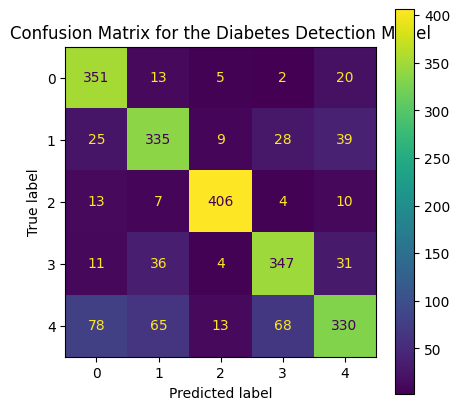

In [46]:
lr_model_tfidf = LogisticRegression()
lr_model_tfidf.fit(X_train_vec_tf_idf, y_train_vec_tf_idf)
y_predict_lr_tfidf = lr_model_tfidf.predict(X_test_vec_tf_idf)
accuracy_lr_model_tfidf = accuracy_score(y_predict_lr_tfidf, y_test_vec_tf_idf)
print(f"accuracy for Logistic Regression model {accuracy_lr_model_tfidf}")

conf_matrix(y_predict_lr_tfidf, y_test_vec_tf_idf, lr_model_tfidf)

### train a model with b-bert

accuracy for Logistic Regression model 0.2311111111111111


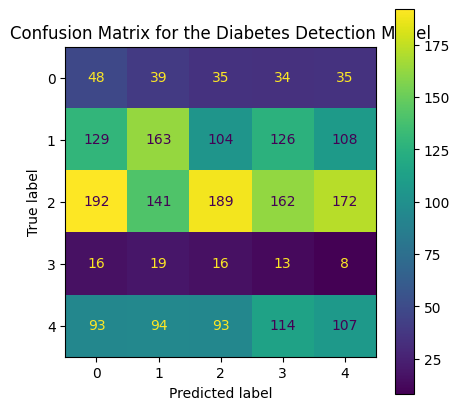

In [47]:
lr_model_pbert = LogisticRegression()
lr_model_pbert.fit(X_train_vec_pbert, y_train_vec_pbert)
y_predict_lr_pbert = lr_model_pbert.predict(X_test_vec_pbert)
accuracy_lr_model_pbert = accuracy_score(y_predict_lr_pbert, y_test_vec_pbert)
print(f"accuracy for Logistic Regression model {accuracy_lr_model_pbert}")

conf_matrix(y_predict_lr_pbert, y_test_vec_pbert, lr_model_pbert)

### train a model with Labse

accuracy for Logistic Regression model 0.2311111111111111


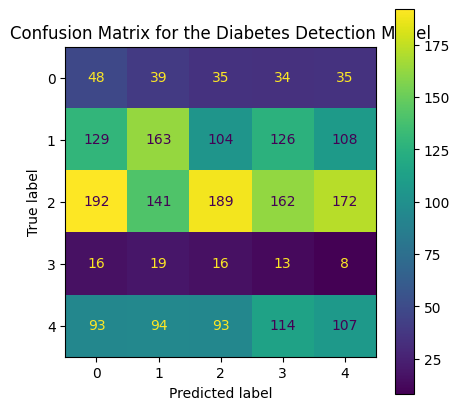

In [48]:
lr_model_Labse = LogisticRegression()
lr_model_Labse.fit(X_train_vec_Labse, y_train_vec_Labse)
y_predict_lr_Labse = lr_model_Labse.predict(X_test_vec_Labse)
accuracy_lr_model_Labse = accuracy_score(y_predict_lr_Labse, y_test_vec_Labse)
print(f"accuracy for Logistic Regression model {accuracy_lr_model_Labse}")

conf_matrix(y_predict_lr_Labse, y_test_vec_Labse, lr_model_Labse)

### train a model with BOW

accuracy for Logistic Regression model 0.7875555555555556


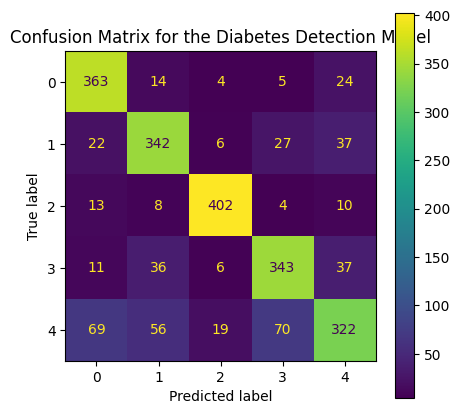

In [49]:
lr_model_bow = LogisticRegression()
lr_model_bow.fit(X_train_vec_bow, y_train_vec_bow)
y_predict_lr_model_bow = lr_model_bow.predict(X_test_vec_bow)
accuracy_lr_model_bow = accuracy_score(y_predict_lr_model_bow, y_test_vec_bow)
print(f"accuracy for Logistic Regression model {accuracy_lr_model_bow}")

conf_matrix(y_predict_lr_model_bow, y_test_vec_bow, lr_model_bow)

### train a model with freq-word

accuracy for Logistic Regression model 0.7586666666666667


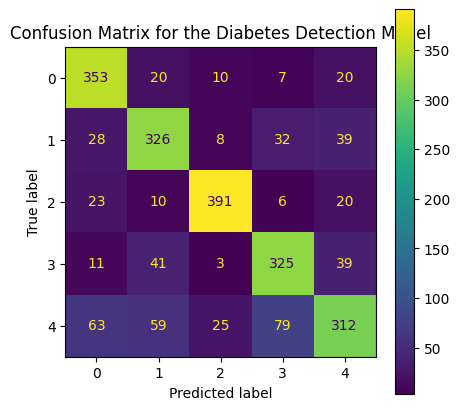

In [50]:
lr_model_fq = LogisticRegression()
lr_model_fq.fit(X_train_vec_fq, y_train_vec_fq)
y_predict_lr_model_fq = lr_model_fq.predict(X_test_vec_fq)
accuracy_lr_model_fq = accuracy_score(y_predict_lr_model_fq, y_test_vec_fq)
print(f"accuracy for Logistic Regression model {accuracy_lr_model_fq}")

conf_matrix(y_predict_lr_model_fq, y_test_vec_fq, lr_model_fq)

## Conclusion

We are plotting the accuracy for four different vectorization methods in this model.








###### part 1- plot

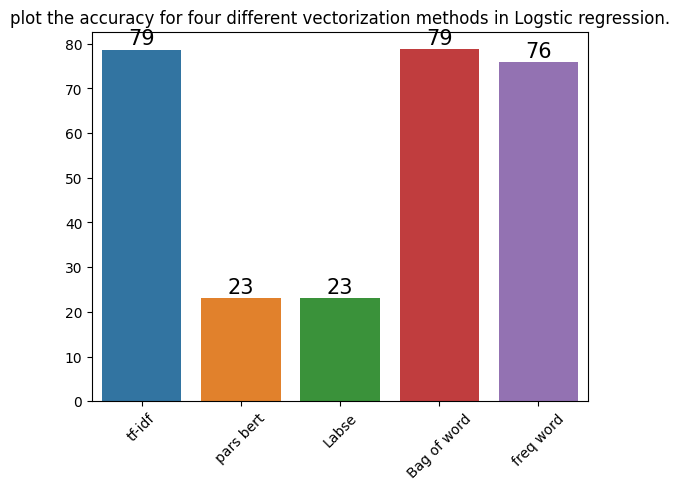

In [51]:
lr_models = {
    "tf-idf" : accuracy_lr_model_tfidf * 100,
    "pars bert" : accuracy_lr_model_pbert * 100,
    "Labse" : accuracy_lr_model_Labse * 100,
    "Bag of word" : accuracy_lr_model_bow * 100,
    "freq word"  : accuracy_lr_model_fq * 100
}



plot_for_each_vec(lr_models, "plot the accuracy for four different vectorization methods in Logstic regression.")

###### part 2- tabel

In [52]:
pd.DataFrame(lr_models, index=[0])

,tf-idf,pars bert,Labse,Bag of word,freq word
0,78.622222,23.111111,23.111111,78.755556,75.866667


## save models

In [53]:
joblib.dump(lr_model_fq, f'lr_model_fq.pkl')
joblib.dump(lr_model_tfidf, f'lr_model_tfidf.pkl')
joblib.dump(lr_model_pbert, f'lr_model_pbert.pkl')
joblib.dump(lr_model_bow, f'lr_model_bow.pkl')
joblib.dump(lr_model_Labse, 'lr_model_Labse.pkl')
print("all models saved")

all models saved


## KNN



Here, for each model, he used 4 different boarders to choose the best model with the best vectors


*   We know that **K** is one of the parameters **KKN** that should be chosen the best, so we made a list of **K** to choose the best one.




###  implementing for train model with different **K**

In [54]:
def knn(n_neighbors, x_train, y_train, x_test, y_test):
  knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn_model.fit(x_train, y_train)
  y_pred =  knn_model.predict(x_test)
  accuracy = accuracy_score(y_pred, y_test)
  return {"model" : knn_model,
          "accuracy" : accuracy}

###  implementing for best models with better accuracy

In [55]:
def find_best(models):
  best_accuracy = 0
  best_model = None
  for n in models:
    detail_model = models[n]
    if detail_model["accuracy"] > best_accuracy:
      best_accuracy = detail_model["accuracy"]
      best_model = detail_model["model"]
  return best_model

### train a model with tf-idf

In [56]:
n_neighbors = list(range(3, 20))


knn_models = {}
for n in n_neighbors:
  knn_models[n] = knn(n, X_train_vec_tf_idf, y_train_vec_tf_idf, X_test_vec_tf_idf, y_test_vec_tf_idf)

pd.DataFrame(knn_models).T


,model,accuracy
3,KNeighborsClassifier(n_neighbors=3),0.680889
4,KNeighborsClassifier(n_neighbors=4),0.705778
5,KNeighborsClassifier(),0.705333
6,KNeighborsClassifier(n_neighbors=6),0.703556
7,KNeighborsClassifier(n_neighbors=7),0.721778
8,KNeighborsClassifier(n_neighbors=8),0.719556
9,KNeighborsClassifier(n_neighbors=9),0.718222
10,KNeighborsClassifier(n_neighbors=10),0.719556
11,KNeighborsClassifier(n_neighbors=11),0.725333
12,KNeighborsClassifier(n_neighbors=12),0.723111


#### find best model and see result

best model is : KNeighborsClassifier(n_neighbors=11)
accuracy for KNN model 0.7862222222222223


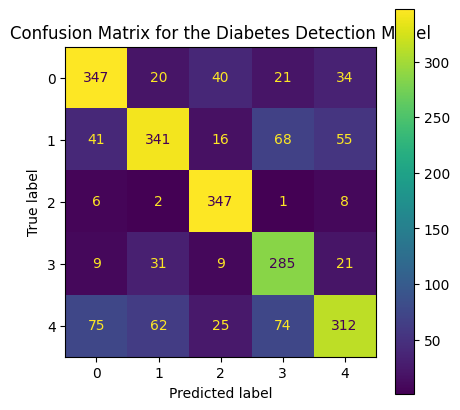

In [57]:
knn_model_tfidf = find_best(knn_models)
y_predict_knn_tfidf = knn_model_tfidf.predict(X_test_vec_tf_idf)
accuracy_knn_model_tfidf = accuracy_score(y_predict_lr_tfidf, y_test_vec_tf_idf)
print(f"best model is : {knn_model_tfidf}")
print(f"accuracy for KNN model {accuracy_knn_model_tfidf}")

conf_matrix(y_predict_knn_tfidf, y_test_vec_tf_idf, knn_model_tfidf)

### train a model with b-bert

In [58]:
knn_models_pbert = {}
for n in n_neighbors:
  knn_models_pbert[n] = knn(n, X_train_vec_pbert, y_train_vec_pbert, X_test_vec_pbert, y_test_vec_pbert)

pd.DataFrame(knn_models_pbert).T

,model,accuracy
3,KNeighborsClassifier(n_neighbors=3),0.244
4,KNeighborsClassifier(n_neighbors=4),0.249778
5,KNeighborsClassifier(),0.242667
6,KNeighborsClassifier(n_neighbors=6),0.248444
7,KNeighborsClassifier(n_neighbors=7),0.253778
8,KNeighborsClassifier(n_neighbors=8),0.243556
9,KNeighborsClassifier(n_neighbors=9),0.251556
10,KNeighborsClassifier(n_neighbors=10),0.245333
11,KNeighborsClassifier(n_neighbors=11),0.251111
12,KNeighborsClassifier(n_neighbors=12),0.254667


#### find best model and see result

best model is : KNeighborsClassifier(n_neighbors=12)
accuracy for KNN model 0.25466666666666665


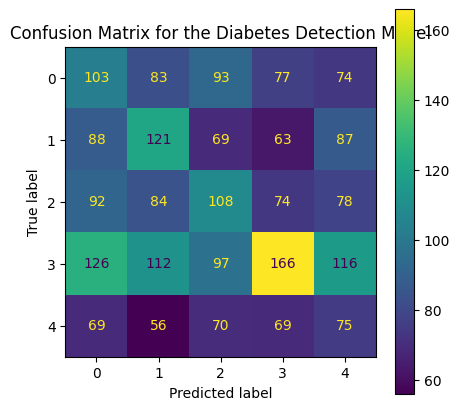

In [59]:
knn_model_pbert = find_best(knn_models_pbert)

y_predict_knn_pbert = knn_model_pbert.predict(X_test_vec_pbert)
accuracy_knn_model_pbert = accuracy_score(y_predict_knn_pbert, y_test_vec_pbert)
print(f"best model is : {knn_model_pbert}")
print(f"accuracy for KNN model {accuracy_knn_model_pbert}")

conf_matrix(y_predict_knn_pbert, y_test_vec_pbert, knn_model_pbert)

### train a model with Labse

In [60]:
knn_models = {}
for n in n_neighbors:
  knn_models[n] = knn(n, X_train_vec_Labse, y_train_vec_Labse, X_test_vec_Labse, y_test_vec_Labse)

pd.DataFrame(knn_models).T

,model,accuracy
3,KNeighborsClassifier(n_neighbors=3),0.244
4,KNeighborsClassifier(n_neighbors=4),0.249778
5,KNeighborsClassifier(),0.242667
6,KNeighborsClassifier(n_neighbors=6),0.248444
7,KNeighborsClassifier(n_neighbors=7),0.253778
8,KNeighborsClassifier(n_neighbors=8),0.243556
9,KNeighborsClassifier(n_neighbors=9),0.251556
10,KNeighborsClassifier(n_neighbors=10),0.245333
11,KNeighborsClassifier(n_neighbors=11),0.251111
12,KNeighborsClassifier(n_neighbors=12),0.254667


#### find best model and see result

best model is : KNeighborsClassifier(n_neighbors=12)
accuracy for KNN model 0.25466666666666665


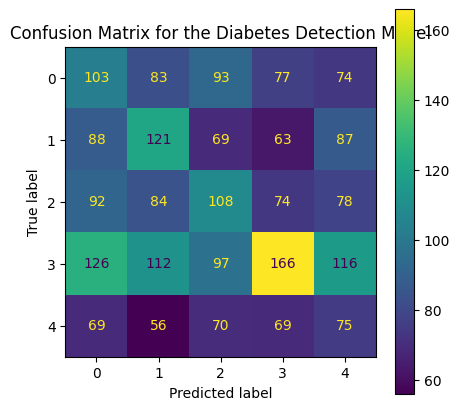

In [61]:
knn_model_Labse = find_best(knn_models)

y_predict_knn_Labse = knn_model_Labse.predict(X_test_vec_Labse)
accuracy_knn_model_Labse = accuracy_score(y_predict_knn_Labse, y_test_vec_Labse)
print(f"best model is : {knn_model_Labse}")
print(f"accuracy for KNN model {accuracy_knn_model_Labse}")

conf_matrix(y_predict_knn_pbert, y_test_vec_pbert, knn_model_Labse)

### train a model with BOW

In [62]:
knn_models = {}
for n in n_neighbors:
  knn_models[n] = knn(n, X_train_vec_bow, y_train_vec_bow, X_test_vec_bow, y_test_vec_bow)

pd.DataFrame(knn_models).T

,model,accuracy
3,KNeighborsClassifier(n_neighbors=3),0.457778
4,KNeighborsClassifier(n_neighbors=4),0.492
5,KNeighborsClassifier(),0.495111
6,KNeighborsClassifier(n_neighbors=6),0.486222
7,KNeighborsClassifier(n_neighbors=7),0.48
8,KNeighborsClassifier(n_neighbors=8),0.478667
9,KNeighborsClassifier(n_neighbors=9),0.478667
10,KNeighborsClassifier(n_neighbors=10),0.472
11,KNeighborsClassifier(n_neighbors=11),0.474222
12,KNeighborsClassifier(n_neighbors=12),0.467556


#### find best model and see result

accuracy for KNN model 0.4951111111111111


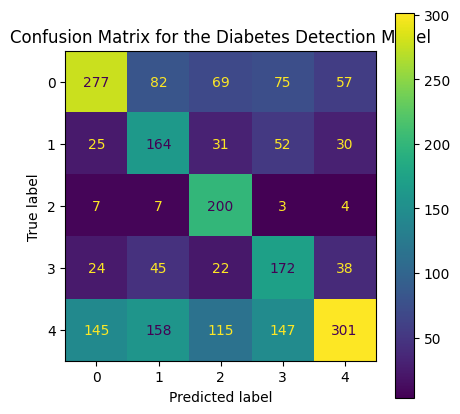

In [63]:
knn_model_bow = find_best(knn_models)



y_predict_knn_model_bow = knn_model_bow.predict(X_test_vec_bow)
accuracy_knn_model_bow = accuracy_score(y_predict_knn_model_bow, y_test_vec_bow)
print(f"accuracy for KNN model {accuracy_knn_model_bow}")

conf_matrix(y_predict_knn_model_bow, y_test_vec_bow, knn_model_bow)

### train a model with freq word

In [64]:
knn_models = {}
for n in n_neighbors:
  knn_models[n] = knn(n, X_train_vec_fq, y_train_vec_fq, X_test_vec_fq, y_test_vec_fq)

pd.DataFrame(knn_models).T

,model,accuracy
3,KNeighborsClassifier(n_neighbors=3),0.76
4,KNeighborsClassifier(n_neighbors=4),0.771111
5,KNeighborsClassifier(),0.770222
6,KNeighborsClassifier(n_neighbors=6),0.776889
7,KNeighborsClassifier(n_neighbors=7),0.772889
8,KNeighborsClassifier(n_neighbors=8),0.775556
9,KNeighborsClassifier(n_neighbors=9),0.777333
10,KNeighborsClassifier(n_neighbors=10),0.778222
11,KNeighborsClassifier(n_neighbors=11),0.779111
12,KNeighborsClassifier(n_neighbors=12),0.779556


#### find best model and see result

accuracy for KNN model 0.7826666666666666


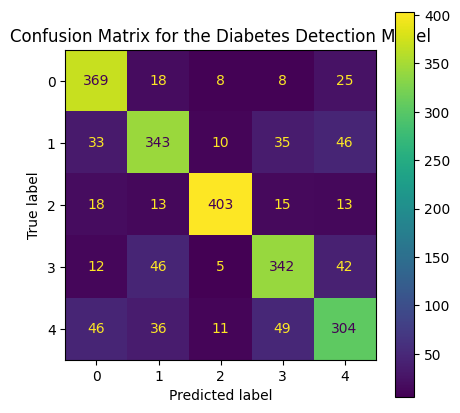

In [65]:
knn_model_fq = find_best(knn_models)



knn_model_fq.fit(X_train_vec_fq, y_train_vec_fq)
y_predict_knn_model_fq = knn_model_fq.predict(X_test_vec_fq)
accuracy_knn_model_fq = accuracy_score(y_predict_knn_model_fq, y_test_vec_fq)
print(f"accuracy for KNN model {accuracy_knn_model_fq}")

conf_matrix(y_predict_knn_model_fq, y_test_vec_fq, knn_model_fq)

## Conclusion

We are plotting the accuracy for four different vectorization methods in this model.








###### part 1- plot

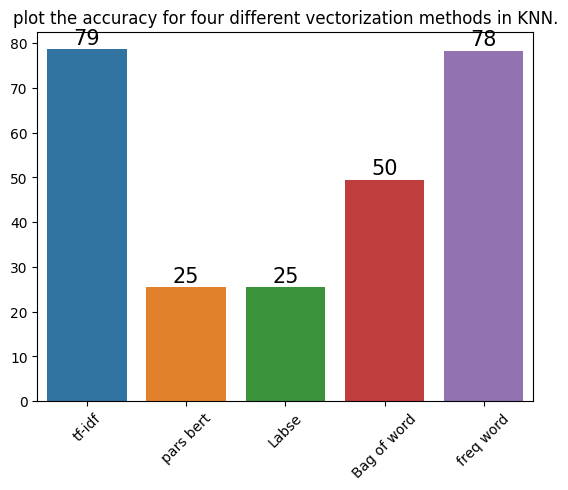

In [66]:
knn_models = {
    "tf-idf" : accuracy_knn_model_tfidf * 100,
    "pars bert" : accuracy_knn_model_pbert * 100,
    "Labse" : accuracy_knn_model_Labse * 100,
    "Bag of word" : accuracy_knn_model_bow * 100,
    "freq word"  : accuracy_knn_model_fq * 100
}



plot_for_each_vec(knn_models, "plot the accuracy for four different vectorization methods in KNN.")

###### part 2- tabel

In [67]:
pd.DataFrame(knn_models, index=[0])

,tf-idf,pars bert,Labse,Bag of word,freq word
0,78.622222,25.466667,25.466667,49.511111,78.266667


# W-KNN



Every neighbor sample has a weight based on its distance to the test sample. Nearer neighbors have bigger weights in the voting.

## Implementation

In [68]:
class w_knn:
    def __init__(self, k):
        self.k = k

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        y_predict = [self._predict(x) for x in x_test]
        return np.array(y_predict)

    def _predict(self, x):
        euclidean_distance = [self._euclidean_distance(x, point) for point in self.x_train]
        index_sort = np.argsort(euclidean_distance)[ : self.k]
        labels_weight = {}
        for index in index_sort:
            if self.y_train[index] in labels_weight:
                labels_weight[self.y_train[index]] += (1 / euclidean_distance[index])
            else:
                labels_weight[self.y_train[index]] = (1 / euclidean_distance[index])
        label, value =  max(labels_weight.items(), key=lambda temp : temp[1])
        return label

    def _euclidean_distance(self, point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))


    def accuracy(self, y, y_predict):
      return np.sum(y == y_predict) / len(y)

# Naive Bayes
Here, for each model, he used 4 different boarders to choose the best model with the best vectors


### train a model with tf-idf




accuracy for Naive Bayes model 0.6804444444444444


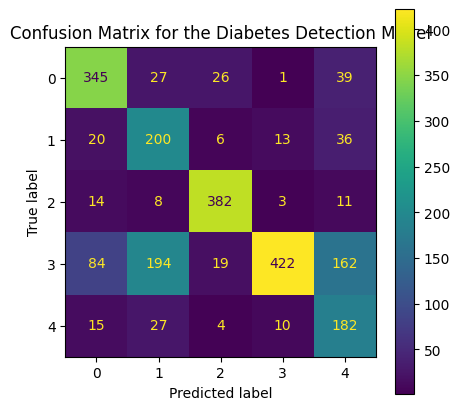

In [69]:
nb_model_tfidf = GaussianNB()
nb_model_tfidf.fit(X_train_vec_tf_idf, y_train_vec_tf_idf)
y_predict_nb_tfidf = nb_model_tfidf.predict(X_test_vec_tf_idf)
accuracy_nb_model_tfidf = accuracy_score(y_predict_nb_tfidf, y_test_vec_tf_idf)
print(f"accuracy for Naive Bayes model {accuracy_nb_model_tfidf}")

conf_matrix(y_predict_nb_tfidf, y_test_vec_tf_idf, nb_model_tfidf)

### train a model with b-bert

accuracy for Naive Bayes model 0.21688888888888888


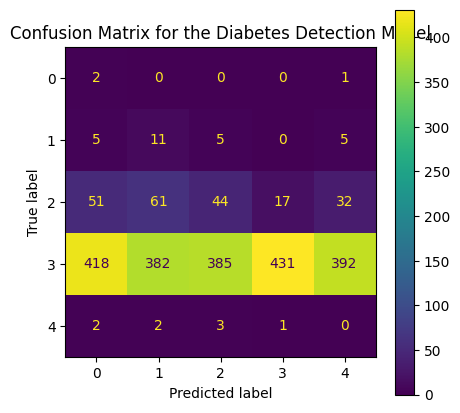

In [70]:
nb_model_pbert = GaussianNB()
nb_model_pbert.fit(X_train_vec_pbert, y_train_vec_pbert)
y_predict_nb_pbert = nb_model_pbert.predict(X_test_vec_pbert)
accuracy_nb_model_pbert = accuracy_score(y_predict_nb_pbert, y_test_vec_pbert)
print(f"accuracy for Naive Bayes model {accuracy_nb_model_pbert}")

conf_matrix(y_predict_nb_pbert, y_test_vec_pbert, nb_model_pbert)

### train a model with Labse

accuracy for Naive Bayes model 0.21688888888888888


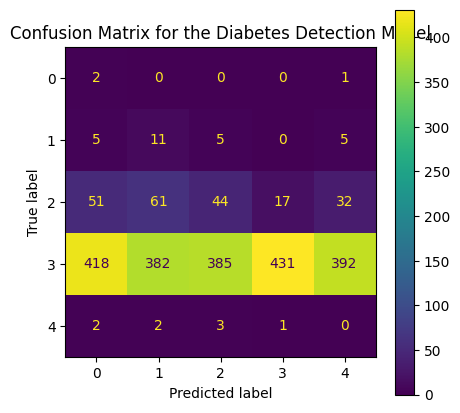

In [71]:
nb_model_Labse = GaussianNB()
nb_model_Labse.fit(X_train_vec_Labse, y_train_vec_Labse)
y_predict_nb_Labse = nb_model_Labse.predict(X_test_vec_Labse)
accuracy_nb_model_Labse = accuracy_score(y_predict_nb_Labse, y_test_vec_Labse)
print(f"accuracy for Naive Bayes model {accuracy_nb_model_Labse}")

conf_matrix(y_predict_nb_Labse, y_test_vec_Labse, nb_model_Labse)

### train a model with BOW

accuracy for Naive Bayes model 0.6937777777777778


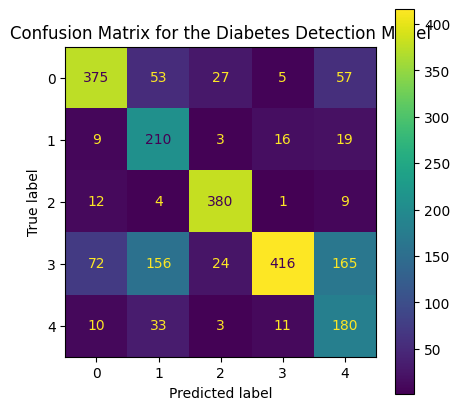

In [72]:
nb_model_bow = GaussianNB()
nb_model_bow.fit(X_train_vec_bow, y_train_vec_bow)
y_predict_nb_model_bow = nb_model_bow.predict(X_test_vec_bow)
accuracy_nb_model_bow = accuracy_score(y_predict_nb_model_bow, y_test_vec_bow)
print(f"accuracy for Naive Bayes model {accuracy_nb_model_bow}")

conf_matrix(y_predict_nb_model_bow, y_test_vec_bow, nb_model_bow)

### train a model with freq-word

accuracy for Naive Bayes model 0.5902222222222222


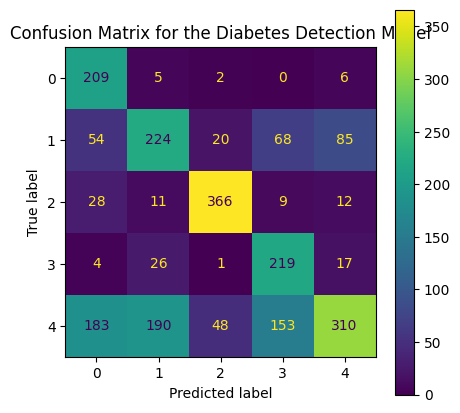

In [73]:
nb_model_fq = GaussianNB()
nb_model_fq.fit(X_train_vec_fq, y_train_vec_fq)
y_predict_nb_model_fq = nb_model_fq.predict(X_test_vec_fq)
accuracy_nb_model_fq = accuracy_score(y_predict_nb_model_fq, y_test_vec_fq)
print(f"accuracy for Naive Bayes model {accuracy_nb_model_fq}")

conf_matrix(y_predict_nb_model_fq, y_test_vec_fq, nb_model_fq)

## Conclusion




###### part 1- plot

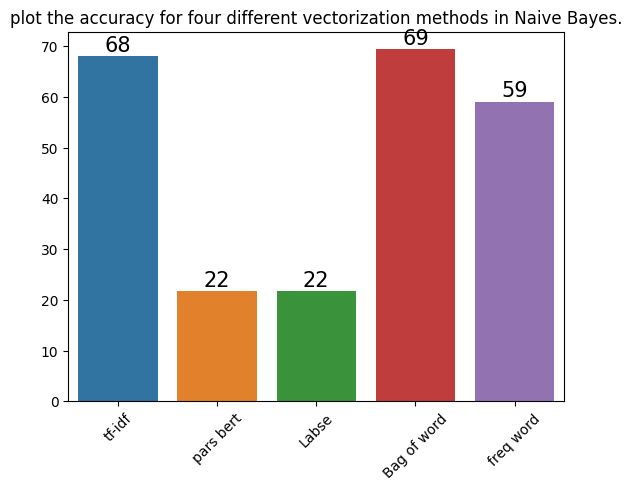

In [74]:
nb_models = {
    "tf-idf" : accuracy_nb_model_tfidf * 100,
    "pars bert" : accuracy_nb_model_pbert * 100,
    "Labse" : accuracy_nb_model_Labse * 100,
    "Bag of word" : accuracy_nb_model_bow * 100,
    "freq word"  : accuracy_nb_model_fq * 100
}



plot_for_each_vec(nb_models, "plot the accuracy for four different vectorization methods in Naive Bayes.")

###### part 2- tabel

In [75]:
pd.DataFrame(nb_models, index=[0])

,tf-idf,pars bert,Labse,Bag of word,freq word
0,68.044444,21.688889,21.688889,69.377778,59.022222


## Decision Tree




Here, for each model, he used 4 different boarders to choose the best model with the best vectors

*   In our decision tree, we have a depth that should stop the tree, now we can define the depth ourselves so that we can choose the best depth

###  implementing for train model with different **depth**





In [76]:
dephes = list(range(50, 1501, 50))


def dt(depth, x_train, y_train, x_test, y_test):
  dt_model = DecisionTreeClassifier(max_depth=depth)
  dt_model.fit(x_train, y_train)
  y_pred =  dt_model.predict(x_test)
  accuracy = accuracy_score(y_pred, y_test)
  return {"model" : dt_model,
          "accuracy" : accuracy}

### train a model with tf-idf

In [77]:
dt_models = {}
for d in dephes:
  dt_models[d] = dt(d, X_train_vec_tf_idf, y_train_vec_tf_idf, X_test_vec_tf_idf, y_test_vec_tf_idf)

pd.DataFrame(dt_models).T

,model,accuracy
50,DecisionTreeClassifier(max_depth=50),0.613778
100,DecisionTreeClassifier(max_depth=100),0.653778
150,DecisionTreeClassifier(max_depth=150),0.675111
200,DecisionTreeClassifier(max_depth=200),0.678667
250,DecisionTreeClassifier(max_depth=250),0.695556
300,DecisionTreeClassifier(max_depth=300),0.689333
350,DecisionTreeClassifier(max_depth=350),0.688
400,DecisionTreeClassifier(max_depth=400),0.688
450,DecisionTreeClassifier(max_depth=450),0.686667
500,DecisionTreeClassifier(max_depth=500),0.689778


#### find best model and see result

best model is : DecisionTreeClassifier(max_depth=250)
accuracy for Decision Tree model 0.6955555555555556


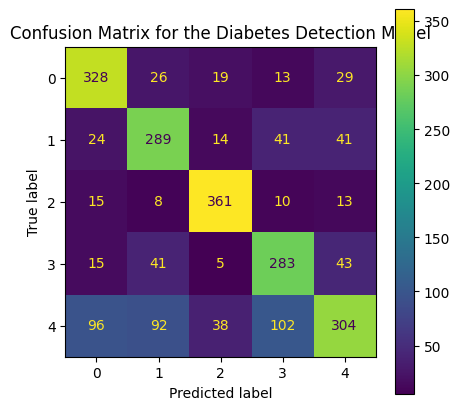

In [78]:
dt_model_tfidf = find_best(dt_models)
y_predict_dt_tfidf = dt_model_tfidf.predict(X_test_vec_tf_idf)
accuracy_dt_model_tfidf = accuracy_score(y_predict_dt_tfidf, y_test_vec_tf_idf)
print(f"best model is : {dt_model_tfidf}")
print(f"accuracy for Decision Tree model {accuracy_dt_model_tfidf}")

conf_matrix(y_predict_dt_tfidf, y_test_vec_tf_idf, dt_model_tfidf)

### train a model with pbert

In [79]:
dt_models = {}
for d in dephes:
  dt_models[d] = dt(d, X_train_vec_pbert, y_train_vec_pbert, X_test_vec_pbert, y_test_vec_pbert)

pd.DataFrame(dt_models).T

,model,accuracy
50,DecisionTreeClassifier(max_depth=50),0.318222
100,DecisionTreeClassifier(max_depth=100),0.309333
150,DecisionTreeClassifier(max_depth=150),0.308
200,DecisionTreeClassifier(max_depth=200),0.311111
250,DecisionTreeClassifier(max_depth=250),0.307556
300,DecisionTreeClassifier(max_depth=300),0.315556
350,DecisionTreeClassifier(max_depth=350),0.307556
400,DecisionTreeClassifier(max_depth=400),0.307556
450,DecisionTreeClassifier(max_depth=450),0.315111
500,DecisionTreeClassifier(max_depth=500),0.315111


#### find best model and see result




best model is : DecisionTreeClassifier(max_depth=250)
accuracy for Decision Tree model 0.3191111111111111


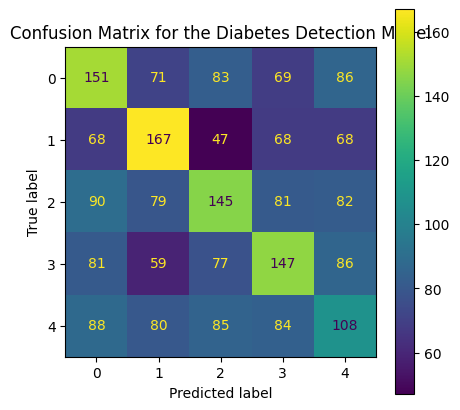

In [80]:
dt_model_pbert = find_best(dt_models)
y_predict_dt_pbert = dt_model_pbert.predict(X_test_vec_pbert)
accuracy_dt_model_pbert = accuracy_score(y_predict_dt_pbert, y_test_vec_pbert)
print(f"best model is : {dt_model_tfidf}")
print(f"accuracy for Decision Tree model {accuracy_dt_model_pbert}")

conf_matrix(y_predict_dt_pbert, y_test_vec_pbert, dt_model_pbert)

### train a model with Labse






In [97]:
dt_models = {}
for d in dephes:
  dt_models[d] = dt(d, X_train_vec_Labse, y_train_vec_Labse, X_test_vec_Labse, y_test_vec_Labse)

pd.DataFrame(dt_models).T

,model,accuracy
50,DecisionTreeClassifier(max_depth=50),0.318667
100,DecisionTreeClassifier(max_depth=100),0.308444
150,DecisionTreeClassifier(max_depth=150),0.309778
200,DecisionTreeClassifier(max_depth=200),0.312444
250,DecisionTreeClassifier(max_depth=250),0.311111
300,DecisionTreeClassifier(max_depth=300),0.312444
350,DecisionTreeClassifier(max_depth=350),0.312444
400,DecisionTreeClassifier(max_depth=400),0.317333
450,DecisionTreeClassifier(max_depth=450),0.311111
500,DecisionTreeClassifier(max_depth=500),0.304


#### find best model and see result




best model is : DecisionTreeClassifier(max_depth=1350)
accuracy for Decision Tree model 0.31955555555555554


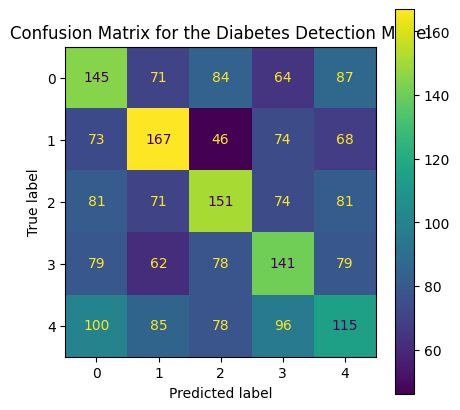

In [98]:
dt_model_Labse = find_best(dt_models)
y_predict_dt_Labse = dt_model_Labse.predict(X_test_vec_Labse)
accuracy_dt_model_Labse = accuracy_score(y_predict_dt_Labse, y_test_vec_Labse)
print(f"best model is : {dt_model_Labse}")
print(f"accuracy for Decision Tree model {accuracy_dt_model_Labse}")

conf_matrix(y_predict_dt_Labse, y_test_vec_Labse, dt_model_Labse)

### train a model with BOW


In [99]:
dt_models = {}
for d in dephes:
  dt_models[d] = dt(d, X_train_vec_bow, y_train_vec_bow, X_test_vec_bow, y_test_vec_bow)

pd.DataFrame(dt_models).T

,model,accuracy
50,DecisionTreeClassifier(max_depth=50),0.582222
100,DecisionTreeClassifier(max_depth=100),0.660444
150,DecisionTreeClassifier(max_depth=150),0.674222
200,DecisionTreeClassifier(max_depth=200),0.676
250,DecisionTreeClassifier(max_depth=250),0.678222
300,DecisionTreeClassifier(max_depth=300),0.681333
350,DecisionTreeClassifier(max_depth=350),0.676
400,DecisionTreeClassifier(max_depth=400),0.674222
450,DecisionTreeClassifier(max_depth=450),0.68
500,DecisionTreeClassifier(max_depth=500),0.670222


#### find best model and see result


best model is : DecisionTreeClassifier(max_depth=1450)
accuracy for Decision Tree model 0.6826666666666666


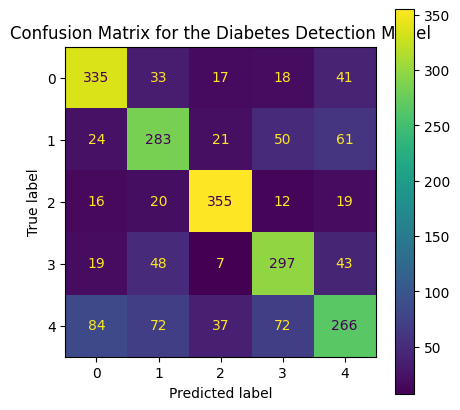

In [100]:
dt_model_bow = find_best(dt_models)
y_predict_dt_bow = dt_model_bow.predict(X_test_vec_bow)
accuracy_dt_model_bow = accuracy_score(y_predict_dt_bow, y_test_vec_bow)
print(f"best model is : {dt_model_bow}")
print(f"accuracy for Decision Tree model {accuracy_dt_model_bow}")

conf_matrix(y_predict_dt_bow, y_test_vec_bow, dt_model_bow)

### train a model with freq words

In [104]:
dt_models = {}
for d in dephes:
  dt_models[d] = dt(d, X_train_vec_fq, y_train_vec_fq, X_test_vec_fq, y_test_vec_fq)

pd.DataFrame(dt_models).T

,model,accuracy
50,DecisionTreeClassifier(max_depth=50),0.7
100,DecisionTreeClassifier(max_depth=100),0.701333
150,DecisionTreeClassifier(max_depth=150),0.694222
200,DecisionTreeClassifier(max_depth=200),0.696889
250,DecisionTreeClassifier(max_depth=250),0.692444
300,DecisionTreeClassifier(max_depth=300),0.697778
350,DecisionTreeClassifier(max_depth=350),0.699556
400,DecisionTreeClassifier(max_depth=400),0.698667
450,DecisionTreeClassifier(max_depth=450),0.700889
500,DecisionTreeClassifier(max_depth=500),0.696444


#### find best model and see result


best model is : DecisionTreeClassifier(max_depth=1050)
accuracy for Decision Tree model 0.7031111111111111


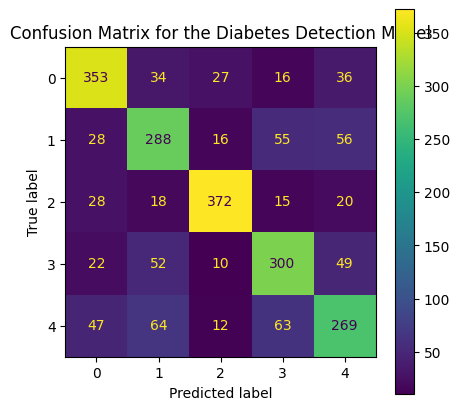

In [105]:
dt_model_fq = find_best(dt_models)
y_predict_dt_fq = dt_model_fq.predict(X_test_vec_fq)
accuracy_dt_model_fq = accuracy_score(y_predict_dt_fq, y_test_vec_fq)
print(f"best model is : {dt_model_fq}")
print(f"accuracy for Decision Tree model {accuracy_dt_model_fq}")

conf_matrix(y_predict_dt_fq, y_test_vec_fq, dt_model_fq)

## Conclusion

We are plotting the accuracy for four different vectorization methods in this model.

###### part 1- plot

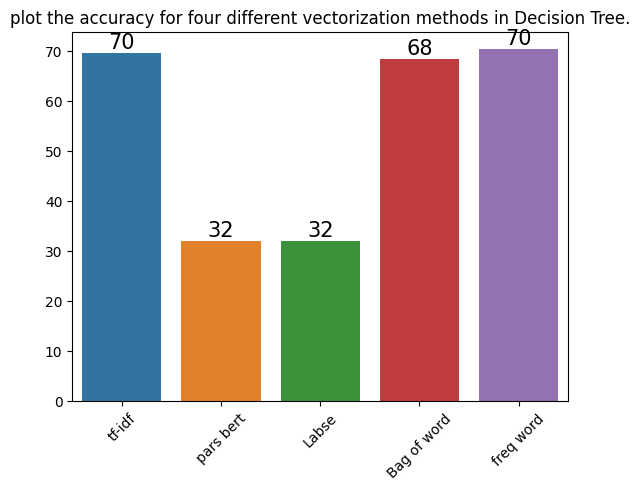

In [107]:
dt_models = {
    "tf-idf" : accuracy_dt_model_tfidf * 100,
    "pars bert" : accuracy_dt_model_pbert * 100,
    "Labse" : accuracy_dt_model_Labse * 100,
    "Bag of word" : accuracy_dt_model_bow * 100,
    "freq word"  : accuracy_dt_model_fq * 100
}



plot_for_each_vec(dt_models, "plot the accuracy for four different vectorization methods in Decision Tree.")

###### part 2- tabel

In [108]:
pd.DataFrame(dt_models, index=[0])

,tf-idf,pars bert,Labse,Bag of word,freq word
0,69.555556,31.911111,31.955556,68.266667,70.311111


##  Random forest


Here, for each model, he used 5 different boarders to choose the best model with the best vectors

*   In our Random forest, we have a depth that should stop the tree, now we can define the depth ourselves so that we can choose the best depth

###  implementing for train model with different **depth**





In [112]:
dephes = list(range(50, 1501, 50))


def rf(depth, x_train, y_train, x_test, y_test):
  dt_model = RandomForestClassifier(max_depth=depth, random_state=0)
  dt_model.fit(x_train, y_train)
  y_pred =  dt_model.predict(x_test)
  accuracy = accuracy_score(y_pred, y_test)
  return {"model" : dt_model,
          "accuracy" : accuracy}

### train a model with tf-idf

In [113]:
rf_models = {}
for d in dephes:
  rf_models[d] = rf(d, X_train_vec_tf_idf, y_train_vec_tf_idf, X_test_vec_tf_idf, y_test_vec_tf_idf)

pd.DataFrame(rf_models).T

,model,accuracy
50,"(DecisionTreeClassifier(max_depth=50, max_feat...",0.695556
100,"(DecisionTreeClassifier(max_depth=100, max_fea...",0.716889
150,"(DecisionTreeClassifier(max_depth=150, max_fea...",0.731111
200,"(DecisionTreeClassifier(max_depth=200, max_fea...",0.738667
250,"(DecisionTreeClassifier(max_depth=250, max_fea...",0.742667
300,"(DecisionTreeClassifier(max_depth=300, max_fea...",0.737778
350,"(DecisionTreeClassifier(max_depth=350, max_fea...",0.742222
400,"(DecisionTreeClassifier(max_depth=400, max_fea...",0.741333
450,"(DecisionTreeClassifier(max_depth=450, max_fea...",0.741333
500,"(DecisionTreeClassifier(max_depth=500, max_fea...",0.741333


#### find best model and see result



best model is : RandomForestClassifier(max_depth=250, random_state=0)
accuracy for Random forest model 0.7426666666666667


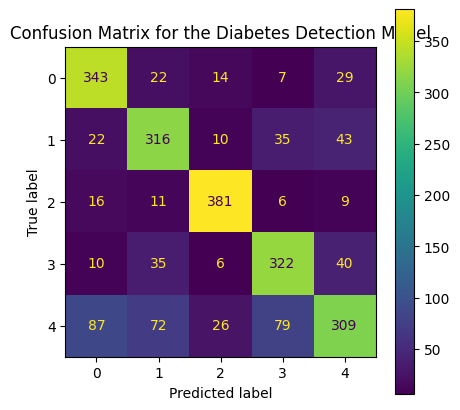

In [115]:
rf_model_tfidf = find_best(rf_models)
y_predict_rf_tfidf = rf_model_tfidf.predict(X_test_vec_tf_idf)
accuracy_rf_model_tfidf = accuracy_score(y_predict_rf_tfidf, y_test_vec_tf_idf)
print(f"best model is : {rf_model_tfidf}")
print(f"accuracy for Random forest model {accuracy_rf_model_tfidf}")


conf_matrix(y_predict_rf_tfidf, y_test_vec_tf_idf, rf_model_tfidf)


### train a model with pbert

In [116]:
rf_models = {}
for d in dephes:
  rf_models[d] = rf(d, X_train_vec_pbert, y_train_vec_pbert, X_test_vec_pbert, y_test_vec_pbert)

pd.DataFrame(rf_models).T

,model,accuracy
50,"(DecisionTreeClassifier(max_depth=50, max_feat...",0.387556
100,"(DecisionTreeClassifier(max_depth=100, max_fea...",0.387556
150,"(DecisionTreeClassifier(max_depth=150, max_fea...",0.387556
200,"(DecisionTreeClassifier(max_depth=200, max_fea...",0.387556
250,"(DecisionTreeClassifier(max_depth=250, max_fea...",0.387556
300,"(DecisionTreeClassifier(max_depth=300, max_fea...",0.387556
350,"(DecisionTreeClassifier(max_depth=350, max_fea...",0.387556
400,"(DecisionTreeClassifier(max_depth=400, max_fea...",0.387556
450,"(DecisionTreeClassifier(max_depth=450, max_fea...",0.387556
500,"(DecisionTreeClassifier(max_depth=500, max_fea...",0.387556


#### find best model and see result

best model is : RandomForestClassifier(max_depth=250, random_state=0)
accuracy for Random forest model 0.38755555555555554


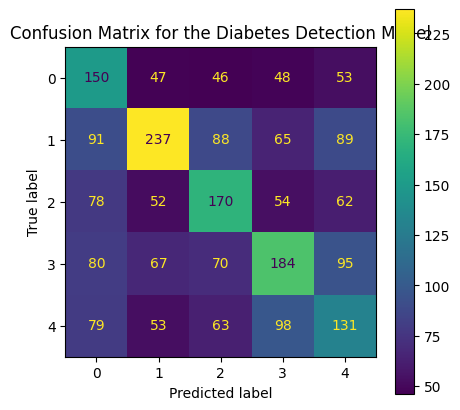

In [118]:
rf_model_pbert = find_best(rf_models)
y_predict_rf_pbert = rf_model_pbert.predict(X_test_vec_pbert)
accuracy_rf_model_pbert = accuracy_score(y_predict_rf_pbert, y_test_vec_pbert)
print(f"best model is : {rf_model_tfidf}")
print(f"accuracy for Random forest model {accuracy_rf_model_pbert}")

conf_matrix(y_predict_rf_pbert, y_test_vec_pbert, rf_model_pbert)

### train a model with Labse

In [119]:
rf_models = {}
for d in dephes:
  rf_models[d] = rf(d, X_train_vec_Labse, y_train_vec_Labse, X_test_vec_Labse, y_test_vec_Labse)

pd.DataFrame(rf_models).T

,model,accuracy
50,"(DecisionTreeClassifier(max_depth=50, max_feat...",0.387556
100,"(DecisionTreeClassifier(max_depth=100, max_fea...",0.387556
150,"(DecisionTreeClassifier(max_depth=150, max_fea...",0.387556
200,"(DecisionTreeClassifier(max_depth=200, max_fea...",0.387556
250,"(DecisionTreeClassifier(max_depth=250, max_fea...",0.387556
300,"(DecisionTreeClassifier(max_depth=300, max_fea...",0.387556
350,"(DecisionTreeClassifier(max_depth=350, max_fea...",0.387556
400,"(DecisionTreeClassifier(max_depth=400, max_fea...",0.387556
450,"(DecisionTreeClassifier(max_depth=450, max_fea...",0.387556
500,"(DecisionTreeClassifier(max_depth=500, max_fea...",0.387556


#### find best model and see result


best model is : DecisionTreeClassifier(max_depth=1350)
accuracy for Random forest model 0.38755555555555554


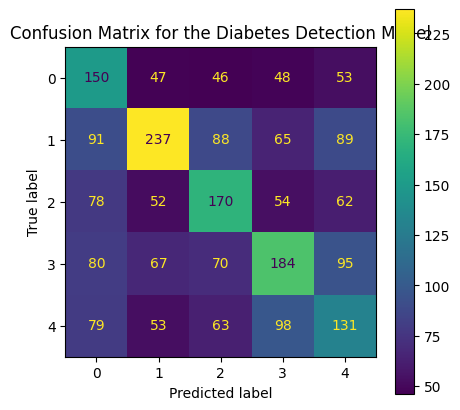

In [120]:
rf_model_Labse = find_best(rf_models)
y_predict_rf_Labse = rf_model_Labse.predict(X_test_vec_Labse)
accuracy_rf_model_Labse = accuracy_score(y_predict_rf_Labse, y_test_vec_Labse)
print(f"best model is : {dt_model_Labse}")
print(f"accuracy for Random forest model {accuracy_rf_model_Labse}")

conf_matrix(y_predict_rf_Labse, y_test_vec_Labse, rf_model_Labse)


### train a model with BOW

In [121]:
rf_models = {}
for d in dephes:
  rf_models[d] = rf(d, X_train_vec_bow, y_train_vec_bow, X_test_vec_bow, y_test_vec_bow)

pd.DataFrame(rf_models).T


,model,accuracy
50,"(DecisionTreeClassifier(max_depth=50, max_feat...",0.692444
100,"(DecisionTreeClassifier(max_depth=100, max_fea...",0.720889
150,"(DecisionTreeClassifier(max_depth=150, max_fea...",0.738222
200,"(DecisionTreeClassifier(max_depth=200, max_fea...",0.738222
250,"(DecisionTreeClassifier(max_depth=250, max_fea...",0.740444
300,"(DecisionTreeClassifier(max_depth=300, max_fea...",0.736
350,"(DecisionTreeClassifier(max_depth=350, max_fea...",0.736
400,"(DecisionTreeClassifier(max_depth=400, max_fea...",0.736
450,"(DecisionTreeClassifier(max_depth=450, max_fea...",0.736
500,"(DecisionTreeClassifier(max_depth=500, max_fea...",0.736


#### find best model and see result


best model is : DecisionTreeClassifier(max_depth=1450)
accuracy for Random forest model 0.7404444444444445


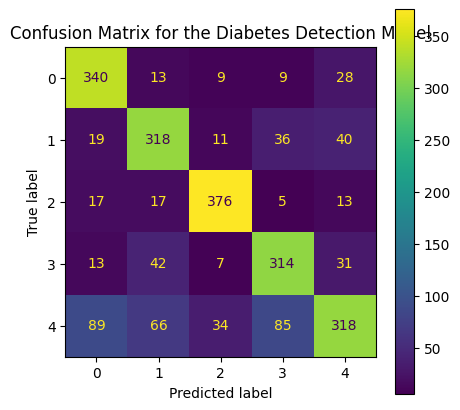

In [122]:
rf_model_bow = find_best(rf_models)
y_predict_rf_bow = rf_model_bow.predict(X_test_vec_bow)
accuracy_rf_model_bow = accuracy_score(y_predict_rf_bow, y_test_vec_bow)
print(f"best model is : {dt_model_bow}")
print(f"accuracy for Random forest model {accuracy_rf_model_bow}")

conf_matrix(y_predict_rf_bow, y_test_vec_bow, rf_model_bow)

### train a model with freq words

In [123]:
rf_models = {}
for d in dephes:
  rf_models[d] = rf(d, X_train_vec_fq, y_train_vec_fq, X_test_vec_fq, y_test_vec_fq)

pd.DataFrame(rf_models).T

,model,accuracy
50,"(DecisionTreeClassifier(max_depth=50, max_feat...",0.784444
100,"(DecisionTreeClassifier(max_depth=100, max_fea...",0.784444
150,"(DecisionTreeClassifier(max_depth=150, max_fea...",0.784444
200,"(DecisionTreeClassifier(max_depth=200, max_fea...",0.784444
250,"(DecisionTreeClassifier(max_depth=250, max_fea...",0.784444
300,"(DecisionTreeClassifier(max_depth=300, max_fea...",0.784444
350,"(DecisionTreeClassifier(max_depth=350, max_fea...",0.784444
400,"(DecisionTreeClassifier(max_depth=400, max_fea...",0.784444
450,"(DecisionTreeClassifier(max_depth=450, max_fea...",0.784444
500,"(DecisionTreeClassifier(max_depth=500, max_fea...",0.784444


#### find best model and see result


best model is : DecisionTreeClassifier(max_depth=1050)
accuracy for Random forest model 0.7844444444444445


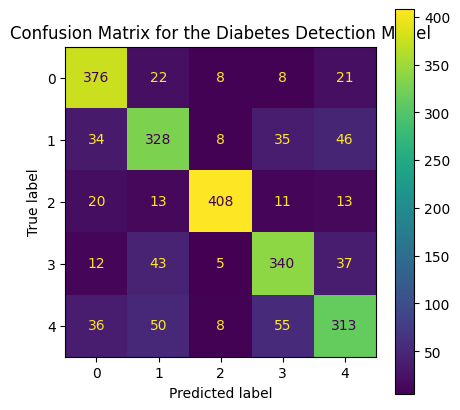

In [124]:
rf_model_fq = find_best(rf_models)
y_predict_rf_fq = rf_model_fq.predict(X_test_vec_fq)
accuracy_rf_model_fq = accuracy_score(y_predict_rf_fq, y_test_vec_fq)
print(f"best model is : {dt_model_fq}")
print(f"accuracy for Random forest model {accuracy_rf_model_fq}")

conf_matrix(y_predict_rf_fq, y_test_vec_fq, rf_model_fq)

## Conclusion

We are plotting the accuracy for four different vectorization methods in this model.

###### part 1- plot

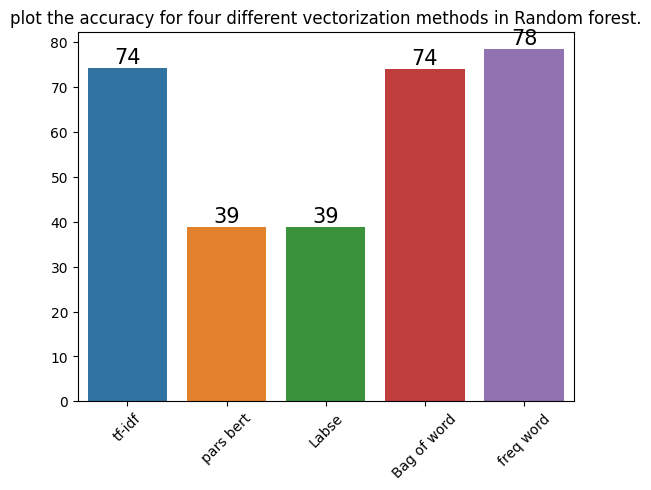

In [125]:
rf_models = {
    "tf-idf" : accuracy_rf_model_tfidf * 100,
    "pars bert" : accuracy_rf_model_pbert * 100,
    "Labse" : accuracy_rf_model_Labse * 100,
    "Bag of word" : accuracy_rf_model_bow * 100,
    "freq word"  : accuracy_rf_model_fq * 100
}



plot_for_each_vec(rf_models, "plot the accuracy for four different vectorization methods in Random forest.")

###### part 2 - tabel

In [126]:
pd.DataFrame(rf_models, index=[0])

,tf-idf,pars bert,Labse,Bag of word,freq word
0,74.266667,38.755556,38.755556,74.044444,78.444444


# Support Vector Machines
Here, for each model, he used 4 different boarders to choose the best model with the best vectors

### train a model with tf-idf

accuracy for SVM model 0.7822222222222223


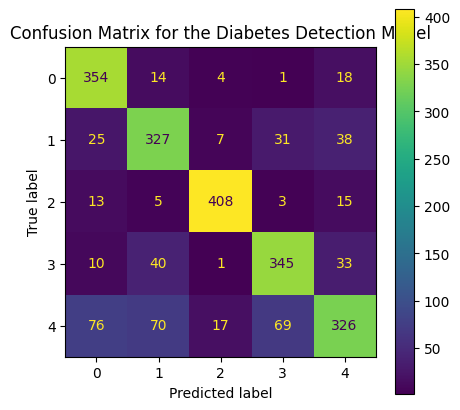

In [83]:
svm_model_tfidf = SVC()
svm_model_tfidf.fit(X_train_vec_tf_idf, y_train_vec_tf_idf)
y_predict_svm_tfidf = svm_model_tfidf.predict(X_test_vec_tf_idf)
accuracy_svm_model_tfidf = accuracy_score(y_predict_svm_tfidf, y_test_vec_tf_idf)
print(f"accuracy for SVM model {accuracy_svm_model_tfidf}")

conf_matrix(y_predict_svm_tfidf, y_test_vec_tf_idf, svm_model_tfidf)

### train a model with b-bert

accuracy for SVM model 0.21688888888888888


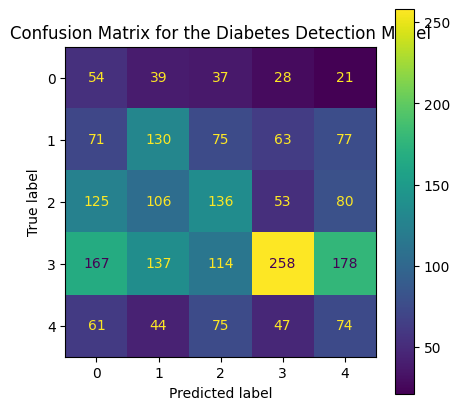

In [84]:
svm_model_pbert = SVC()
svm_model_pbert.fit(X_train_vec_pbert, y_train_vec_pbert)
y_predict_svm_pbert = svm_model_pbert.predict(X_test_vec_pbert)
accuracy_svm_model_pbert = accuracy_score(y_predict_nb_pbert, y_test_vec_pbert)
print(f"accuracy for SVM model {accuracy_svm_model_pbert}")

conf_matrix(y_predict_svm_pbert, y_test_vec_pbert, svm_model_pbert)

### train a model with Labse

accuracy for SVM model 0.21688888888888888


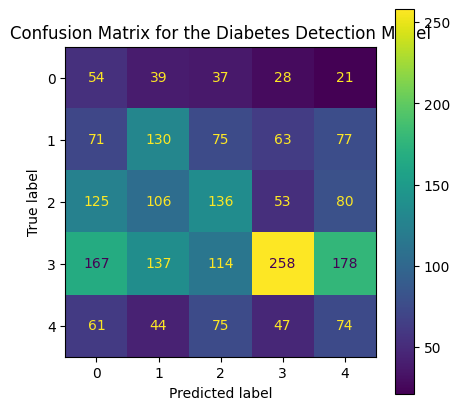

In [85]:
svm_model_Labse = SVC()
svm_model_Labse.fit(X_train_vec_Labse, y_train_vec_Labse)
y_predict_svm_Labse = svm_model_Labse.predict(X_test_vec_Labse)
accuracy_svm_model_Labse = accuracy_score(y_predict_nb_Labse, y_test_vec_Labse)
print(f"accuracy for SVM model {accuracy_svm_model_Labse}")

conf_matrix(y_predict_svm_Labse, y_test_vec_Labse, svm_model_Labse)

### train a model with BOW

accuracy for SVM model 0.6937777777777778


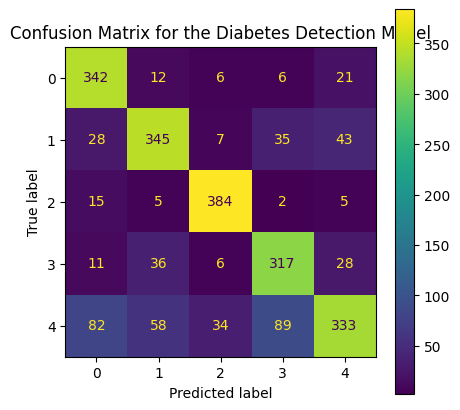

In [86]:
svm_model_bow = SVC()
svm_model_bow.fit(X_train_vec_bow, y_train_vec_bow)
y_predict_svm_model_bow = svm_model_bow.predict(X_test_vec_bow)
accuracy_svm_model_bow = accuracy_score(y_predict_nb_model_bow, y_test_vec_bow)
print(f"accuracy for SVM model {accuracy_svm_model_bow}")

conf_matrix(y_predict_svm_model_bow, y_test_vec_bow, svm_model_bow)

### train a model with freq-word

accuracy for SVM model 0.7755555555555556


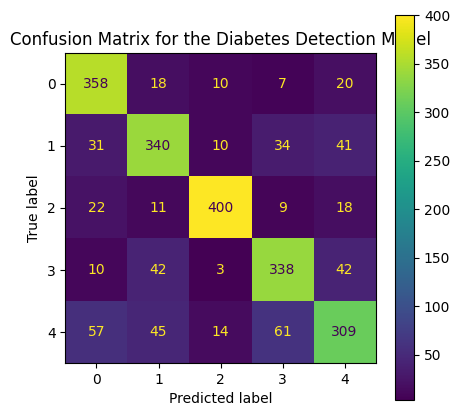

In [87]:
svm_model_fq = SVC()
svm_model_fq.fit(X_train_vec_fq, y_train_vec_fq)
y_predict_svm_model_fq = svm_model_fq.predict(X_test_vec_fq)
accuracy_svm_model_fq = accuracy_score(y_predict_svm_model_fq, y_test_vec_fq)
print(f"accuracy for SVM model {accuracy_svm_model_fq}")

conf_matrix(y_predict_svm_model_fq, y_test_vec_fq, svm_model_fq)

## Conclusion

We are plotting the accuracy for four different vectorization methods in this model.


###### part 1- plot

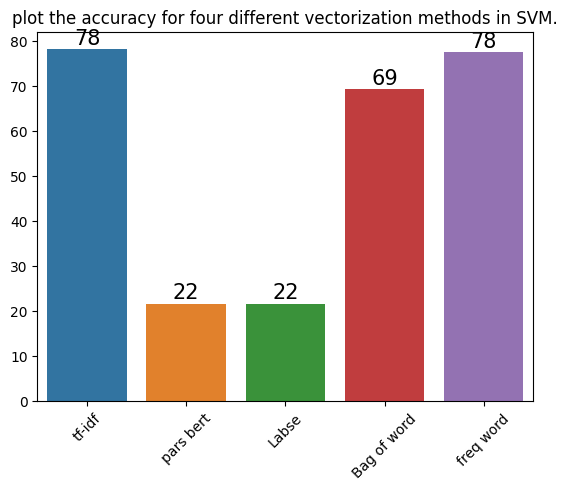

In [88]:
svm_models = {
    "tf-idf" : accuracy_svm_model_tfidf * 100,
    "pars bert" : accuracy_svm_model_pbert * 100,
    "Labse" : accuracy_svm_model_Labse * 100,
    "Bag of word" : accuracy_svm_model_bow * 100,
    "freq word"  : accuracy_svm_model_fq * 100
}



plot_for_each_vec(svm_models, "plot the accuracy for four different vectorization methods in SVM.")

###### part 2- tabel

In [89]:
pd.DataFrame(svm_models, index=[0])

,tf-idf,pars bert,Labse,Bag of word,freq word
0,78.222222,21.688889,21.688889,69.377778,77.555556
